In [1]:
""" Define a neural network with a single hidden layer. """
# import pytorch
import torch
import torch.nn as nn
# set the random seed for reproducibility
torch.manual_seed(5984)

class Net(nn.Module):
    def __init__(self, n_relus: int = 2):
        super().__init__()

        
        self.linear_reul_stack = nn.Sequential(
            nn.Linear(1, n_relus), # Layer 1
            nn.ReLU(),             # Layer 2
            nn.Linear(n_relus,1),  # Layer 3
        )

    def forward(self, x):
        """ Define forward model """
        out = self.linear_reul_stack(x)
        return out

In [9]:
import numpy as np
file_name = 'GPS_v'
data = np.loadtxt(f'{file_name}.txt', dtype="float64", delimiter=" ")

x = data[:,0] # X is the distance form reference point.
y = data[:,1] # Y is uplift rates.


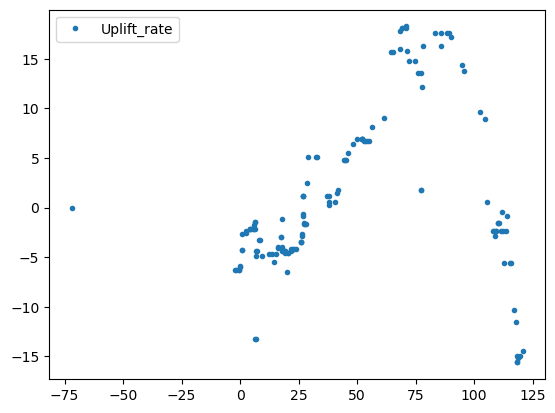

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(x, y, '.', label="Uplift_rate")
ax.legend()

plt.show()

In [14]:
""" Define a loss function. """

def loss(y_true : np.ndarray, y_pred : np.ndarray) -> float:
    """ returns the mean squared error between y_true and y_pred """
    return np.square(y_true-y_pred).mean()

# calculate the loss for the fit


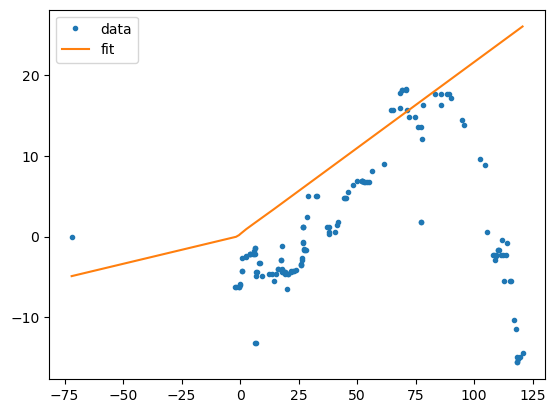

In [17]:
""" Show the initial model prediction/fit (it's bad)"""
# convert x, y to torch tensor
xt = torch.from_numpy(x).unsqueeze(1).to(torch.float32)
yt = torch.from_numpy(y).unsqueeze(1).to(torch.float32)

model_2 = Net(n_relus=20)
pred = model_2(xt)


fig, ax = plt.subplots()

ax.plot(x, y, '.', label="data")
ax.plot(x, pred.detach().numpy(), label="fit")
ax.legend()

plt.show()

In [26]:
""" Train the model the bad way. """
# set hyperparameters

learning_rate = 0.01
training_steps = 1000
num_relus = 2000

# define the model
torch.manual_seed(5984)
model_2 = Net(n_relus= num_relus)

# define loss
loss_fn = nn.MSELoss()

# define optimized
optim = torch.optim.Adam(model_2.parameters(), lr = learning_rate)

# Training loop
for n in range(training_steps):
    # calculate the prediction
    pred = model_2(xt)

    # claculate the loss
    loss = loss_fn(pred, yt)

    # reset the gradients
    optim.zero_grad()

    # calculate the gradients of the parameters wrt anf loss
    loss.backward()

    # updata parameter
    optim.step()

    # print the lost every 100 steps
    if n % 100 == 0 :
        print(f"Step {n}: {loss.item():.3f}")

Step 0: 131.586
Step 100: 60.035
Step 200: 55.879
Step 300: 48.161
Step 400: 36.655
Step 500: 25.642
Step 600: 18.640
Step 700: 15.468
Step 800: 14.145
Step 900: 13.231


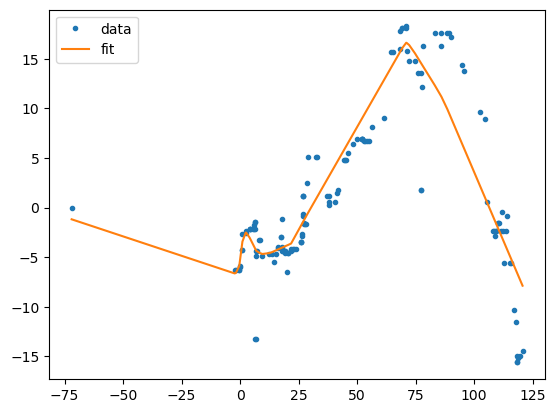

In [27]:
""" Plot the trained model. """
fig, ax = plt.subplots()

ax.plot(x, y, '.', label="data")
ax.plot(x, pred.detach().numpy(), label="fit")
ax.legend()

plt.show()